# Velocity Verlet integrator

Integration scheme as described in Gromacs manual.
1. Calculate $\overrightarrow{x}(t + \Delta t) = \overrightarrow{x}(t) + \overrightarrow{v}\Delta t + \frac{1}{2} \overrightarrow{a}(t)\Delta t^2$
2. Calculate $\overrightarrow{a}(t + \Delta t)$ from force field using $\overrightarrow{x}(t + \Delta t)$.
3. Calculate $\overrightarrow{v}(t + \Delta t) = \overrightarrow{v}(t) + \frac{1}{2}(\overrightarrow{a}(t) + \overrightarrow{a}(t + \Delta t)) \Delta t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import verlet as v

### Example force

In [2]:
def gravitation(x, m):
    """
    Naive implementation of gravitational force.
    x - coordinates of particles
    m - masses of particles
    """
    # print(x)
    f = np.zeros(x.shape)
    # print(f)
    for i in range(len(m)):
        for j in range(len(m)):
            if i != j:
            # print('diff ', np.linalg.norm(x[i, :] - x[j, :]))
                
                abs_value = m[i] * m[j] / (np.linalg.norm(x[i, :] - x[j, :])) ** 2
                direction = x[j, :] - x[i, :]
                # print("coord ", x[j, :], x[i, :])
                # print("direction ", direction)
                direction = direction / np.linalg.norm(direction)
                f[i, :] += abs_value * direction
    return f

### Planet and star

In [3]:
x_0 = np.array([[0, 0, 0], [20, 0, 0]])
v_0 = np.array([[0, 0, 0], [0, 7, 0]])
m = np.array([10000, 1])

In [4]:
T, X = v.velocity_verlet(0, 5, 0.001, lambda x: gravitation(x, m), m, x_0, v_0)

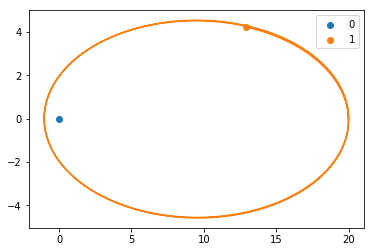

In [5]:
plt.plot(X[0, 0, :], X[0, 1, :])
plt.scatter(X[0, 0, -1], X[0, 1, -1], label = "0")
plt.plot(X[1, 0, :], X[1, 1, :])
plt.scatter(X[1, 0, -1], X[1, 1, -1], label = "1")
plt.legend()